<a href="https://colab.research.google.com/github/harshath2000/Intro_to_ML_Assignment_4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inroduction to Machine Learning

Assignment 4

Harshath Manchika

801393748

In this assignment, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this assignment across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Problem 1

In [ ]:
url = '/content/cancer.csv'
data_cancer = pd.read_csv(url)
removed_column = data_cancer.pop('diagnosis')
data_cancer.pop('Unnamed: 32')
Y = pd.DataFrame({'diagnosis': removed_column})
X = data_cancer
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X)
X_standard = std_scaler.transform(X)
Y = Y.values.ravel()
n = X.shape[1]
accuracy_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []


def train_and_evaluate_classifier(n_components, X_standard, Y):
    # Perform PCA
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(X_standard)

    # Splitting the dataset into the Training set and Test set
    X_training, X_testing, y_training, y_testing = train_test_split(
        principalComponents, Y, test_size=0.20, random_state=0
    )

    # Creating and training the Support Vector Classifier
    classifier = SVC(kernel='linear', C=10)
    classifier.fit(X_training, y_training)
    Y_predict = classifier.predict(X_testing)

    # Calculating metrics
    accuracy = metrics.accuracy_score(y_testing, Y_predict)
    precision = metrics.precision_score(y_testing, Y_predict, pos_label="M")
    recall = metrics.recall_score(y_testing, Y_predict, pos_label="M")
    f1_score = metrics.f1_score(y_testing, Y_predict, pos_label="M")

    # Display metrics

    print(f"K = {n_components}: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")


    # Store the metrics
    accuracy_list.append(accuracy * 100.0)
    precision_list.append(precision * 100.0)
    recall_list.append(recall * 100.0)
    f1score_list.append(f1_score * 100.0)
    k_list.append(n_components)

# Iterate through the range of K values
for i in range(n):
    train_and_evaluate_classifier(i + 1, X_standard, Y)

# Identify the highest accuracy and corresponding K value
high_accuracy = max(accuracy_list)
high_accuracy_k = k_list[accuracy_list.index(high_accuracy)]

# Display the best performance
print(f"The Highest Classification Accuracy Achieved using linear kernel: {high_accuracy:.2f}% for K number = {high_accuracy_k}")

K = 1: Accuracy: 0.9035, Precision: 0.8750, Recall: 0.8936, F1-Score: 0.8842
K = 2: Accuracy: 0.9211, Precision: 0.8800, Recall: 0.9362, F1-Score: 0.9072
K = 3: Accuracy: 0.9211, Precision: 0.8800, Recall: 0.9362, F1-Score: 0.9072
K = 4: Accuracy: 0.9474, Precision: 0.9362, Recall: 0.9362, F1-Score: 0.9362
K = 5: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 6: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 7: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 8: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 9: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 10: Accuracy: 0.9386, Precision: 0.9167, Recall: 0.9362, F1-Score: 0.9263
K = 11: Accuracy: 0.9386, Precision: 0.9167, Recall: 0.9362, F1-Score: 0.9263
K = 12: Accuracy: 0.9474, Precision: 0.9184, Recall: 0.9574, F1-Score: 0.9375
K = 13: Accuracy: 0.9474, Precision: 0.9184, Recall: 0.9574, F1-Score: 0.

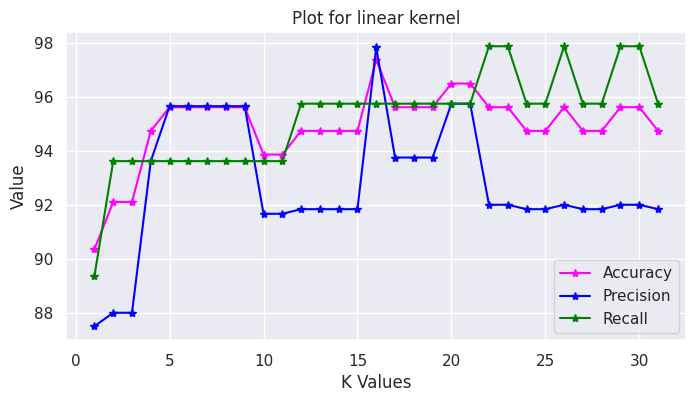

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in magenta
plt.plot(k_list, accuracy_list, marker='*', linestyle='-', color='magenta', label='Accuracy')

# Plot Precision in blue
plt.plot(k_list, precision_list, marker='*', linestyle='-', color='blue', label='Precision')

# Plot Recall in green
plt.plot(k_list, recall_list, marker='*', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Using Polynomial Kernal

In [ ]:
# Function to train and evaluate classifier with polynomial kernel
def evaluate_classifier_with_pca(n_components, X_standard, Y):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(X_standard)
    X_train, X_test, y_train, y_test = train_test_split(
        principalComponents, Y, test_size=0.20, random_state=0
    )

    classifier = SVC(kernel='poly', C=10)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Compute metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, pos_label="M")
    recall = metrics.recall_score(y_test, y_pred, pos_label="M")
    f1_score = metrics.f1_score(y_test, y_pred, pos_label="M")

    return accuracy, precision, recall, f1_score

# Lists to hold metrics
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
k_list = []

# Main loop
for i in range(n):
    accuracy, precision, recall, f1_score = evaluate_classifier_with_pca(i + 1, X_standard, Y)

    # Print metrics

    print(f"K = {i+ 1}: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
    # Store the metrics
    accuracy_list.append(accuracy * 100)
    precision_list.append(precision * 100)
    recall_list.append(recall * 100)
    f1score_list.append(f1_score * 100)
    k_list.append(i + 1)

# Find the highest accuracy
high_accuracy = max(accuracy_list)
high_accuracy_k = k_list[accuracy_list.index(high_accuracy)]

# Print the best performance
print(f"The Highest Classification Accuracy Achieved using polynomial kernel: {high_accuracy:.2f}% for K number = {high_accuracy_k}")


K = 1: Accuracy: 0.8596, Precision: 1.0000, Recall: 0.6596, F1-Score: 0.7949
K = 2: Accuracy: 0.9298, Precision: 0.9756, Recall: 0.8511, F1-Score: 0.9091
K = 3: Accuracy: 0.9298, Precision: 1.0000, Recall: 0.8298, F1-Score: 0.9070
K = 4: Accuracy: 0.9474, Precision: 0.9556, Recall: 0.9149, F1-Score: 0.9348
K = 5: Accuracy: 0.9649, Precision: 0.9778, Recall: 0.9362, F1-Score: 0.9565
K = 6: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 7: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 8: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 9: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 10: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 11: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 12: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 13: Accuracy: 0.9737, Precision: 0.9783, Recall: 0.9574, F1-Score: 0.

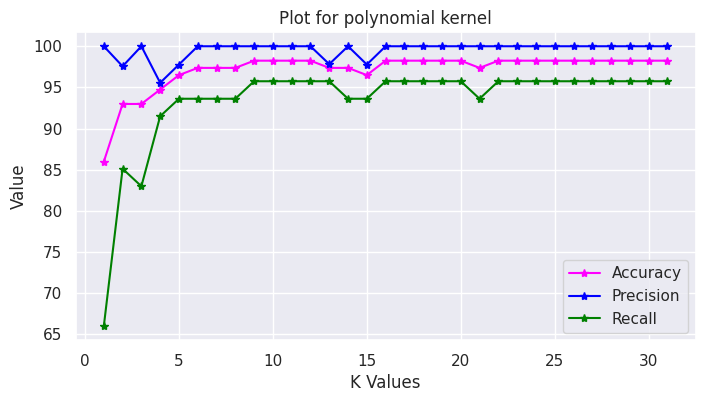

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in magenta
plt.plot(k_list, accuracy_list, marker='*', linestyle='-', color='magenta', label='Accuracy')

# Plot Precision in blue
plt.plot(k_list, precision_list, marker='*', linestyle='-', color='blue', label='Precision')

# Plot Recall in green
plt.plot(k_list, recall_list, marker='*', linestyle='-', color='green', label='Recall')

plt.title('Plot for polynomial kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

def perform_pca_svc_evaluation(X, Y, kernel_type, C_value, max_components, test_size, random_state):
    # Prepare lists to store metrics for each k value
    metrics_results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1score': [],
        'k_value': []
    }

    # Evaluate the classifier for each k value
    for k in range(1, max_components + 1):
        pca = PCA(n_components=k)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=test_size, random_state=random_state)

        classifier = SVC(kernel=kernel_type, C=C_value)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Compute metrics
        metrics_results['accuracy'].append(metrics.accuracy_score(y_test, y_pred) * 100.0)
        metrics_results['precision'].append(metrics.precision_score(y_test, y_pred, pos_label="M") * 100.0)
        metrics_results['recall'].append(metrics.recall_score(y_test, y_pred, pos_label="M") * 100.0)
        metrics_results['f1score'].append(metrics.f1_score(y_test, y_pred, pos_label="M") * 100.0)
        metrics_results['k_value'].append(k)

        # Print metrics for current k
        print(f"K = {k}: Accuracy = {metrics_results['accuracy'][-1]:.2f}%, Precision = {metrics_results['precision'][-1]:.2f}%, Recall = {metrics_results['recall'][-1]:.2f}%, F1-Score = {metrics_results['f1score'][-1]:.2f}%")

    return metrics_results

# Main evaluation with given parameters
metrics_results = perform_pca_svc_evaluation(X_standard, Y, 'rbf', 10, n, 0.20, 0)

# Determine the highest accuracy and the corresponding k value
max_accuracy_index = metrics_results['accuracy'].index(max(metrics_results['accuracy']))
high_accuracy = metrics_results['accuracy'][max_accuracy_index]
high_accuracy_k = metrics_results['k_value'][max_accuracy_index]

# Print the best performance
print(f"The Highest Classification Accuracy Achieved using RBF kernel: {high_accuracy:.2f}% for K number = {high_accuracy_k}")

K = 1: Accuracy = 89.47%, Precision = 85.71%, Recall = 89.36%, F1-Score = 87.50%
K = 2: Accuracy = 90.35%, Precision = 86.00%, Recall = 91.49%, F1-Score = 88.66%
K = 3: Accuracy = 92.98%, Precision = 91.49%, Recall = 91.49%, F1-Score = 91.49%
K = 4: Accuracy = 94.74%, Precision = 93.62%, Recall = 93.62%, F1-Score = 93.62%
K = 5: Accuracy = 95.61%, Precision = 95.65%, Recall = 93.62%, F1-Score = 94.62%
K = 6: Accuracy = 96.49%, Precision = 97.78%, Recall = 93.62%, F1-Score = 95.65%
K = 7: Accuracy = 97.37%, Precision = 100.00%, Recall = 93.62%, F1-Score = 96.70%
K = 8: Accuracy = 98.25%, Precision = 100.00%, Recall = 95.74%, F1-Score = 97.83%
K = 9: Accuracy = 99.12%, Precision = 100.00%, Recall = 97.87%, F1-Score = 98.92%
K = 10: Accuracy = 99.12%, Precision = 100.00%, Recall = 97.87%, F1-Score = 98.92%
K = 11: Accuracy = 98.25%, Precision = 100.00%, Recall = 95.74%, F1-Score = 97.83%
K = 12: Accuracy = 99.12%, Precision = 100.00%, Recall = 97.87%, F1-Score = 98.92%
K = 13: Accuracy = 

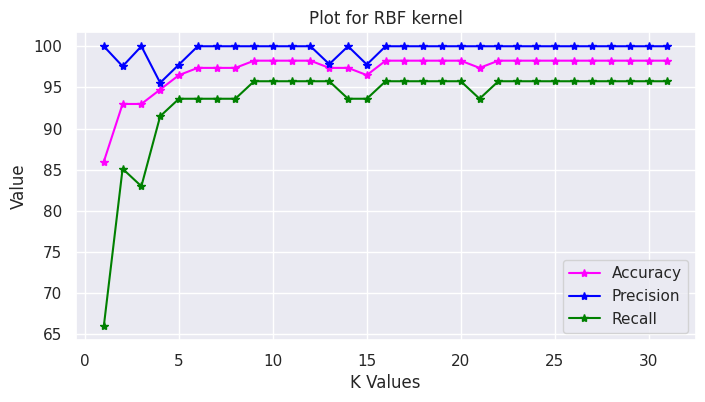

In [ ]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in magenta
plt.plot(k_list, accuracy_list, marker='*', linestyle='-', color='magenta', label='Accuracy')

# Plot Precision in blue
plt.plot(k_list, precision_list, marker='*', linestyle='-', color='blue', label='Precision')

# Plot Recall in green
plt.plot(k_list, recall_list, marker='*', linestyle='-', color='green', label='Recall')

plt.title('Plot for RBF kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

In [ ]:
url = '/content/Housing.csv'
House_data = pd.read_csv(url)

In [ ]:
def preprocess(data,variables):
  new_data = data[variables].replace({'yes':1,'no':0})
  x = new_data.iloc[:,1:]
  m = x.shape[0]
  y = np.array(new_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))
  return x,y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
variable = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X,y = preprocess(House_data,variable)
std_scaler = MinMaxScaler()
std_scaler.fit(X)
X_standard = std_scaler.transform(X)

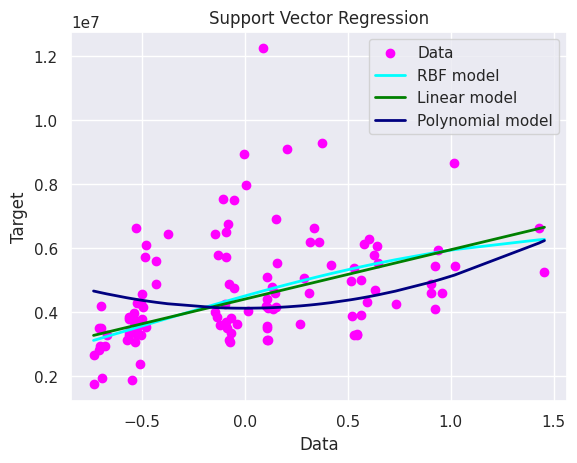

In [ ]:
def perform_svr_and_plot(X_scaled, y):
    # Define SVR models with different kernels
    svr_rbf = SVR(kernel='rbf', C=3e6, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=2e5)
    svr_poly = SVR(kernel='poly', C=5e6, degree=2)

    # PCA Transformation
    n_components = 1
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(X_scaled)

    # Splitting the dataset into the Training set and Test set
    X_training, X_testing, Y_training, Y_testing = train_test_split(
        principalComponents, y, test_size=0.20, random_state=0
    )

    # Fitting SVR models
    pred_rbf = svr_rbf.fit(X_training, Y_training.ravel()).predict(X_testing)
    pred_lin = svr_lin.fit(X_training, Y_training.ravel()).predict(X_testing)
    pred_poly = svr_poly.fit(X_training, Y_training.ravel()).predict(X_testing)

    # Sorting for plotting
    sort_order = np.argsort(X_testing.ravel())
    X_testing_sorted = X_testing[sort_order].ravel()

    # Plot settings
    lw = 2
    plt.scatter(X_testing_sorted, Y_testing[sort_order].ravel(), color='magenta', label='Data')
    plt.plot(X_testing_sorted, pred_rbf[sort_order].ravel(), color='cyan', lw=lw, label='RBF model')
    plt.plot(X_testing_sorted, pred_lin[sort_order].ravel(), color='green', lw=lw, label='Linear model')
    plt.plot(X_testing_sorted, pred_poly[sort_order].ravel(), color='navy', lw=lw, label='Polynomial model')

    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Call the function with scaled features and the target variable
perform_svr_and_plot(X_scaled, y)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
def perform_pca_and_predict(X, y, n_components, model):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, train_size=0.8, test_size=0.2, random_state=0)
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    return y_test, y_pred

def calculate_metrics(y_test, y_pred):
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Variables to store the best model's metrics and corresponding k
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
rmse_list = []

# Iterate over different numbers of principal components
for k in range(1, X.shape[1]):
    y_test, y_pred = perform_pca_and_predict(X_standard, y, k, SVR(kernel='linear', C=2e5))
    rmse, r2 = calculate_metrics(y_test, y_pred)
    rmse_list.append(rmse)

    # Check if the current model's RMSE is the best and update the best values
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

# Output the best model's metrics
print("Linear kernel")
print("Best K value is:", best_k)
print(f'Best RMSE for K={best_k}: {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')


K=1: RMSE = 1607985.34, R2 = 0.10
K=2: RMSE = 1341873.86, R2 = 0.38
K=3: RMSE = 1360158.03, R2 = 0.36
K=4: RMSE = 1319655.91, R2 = 0.40
K=5: RMSE = 1357628.15, R2 = 0.36
K=6: RMSE = 1170199.18, R2 = 0.52
K=7: RMSE = 1143340.00, R2 = 0.55
K=8: RMSE = 1145924.56, R2 = 0.54
K=9: RMSE = 1061108.34, R2 = 0.61
K=10: RMSE = 1041682.42, R2 = 0.62
K=11: RMSE = 1009279.75, R2 = 0.65
Linear kernel
Best K value is: 11
Best RMSE for K=11: 1009279.75
Corresponding Best R2: 0.65


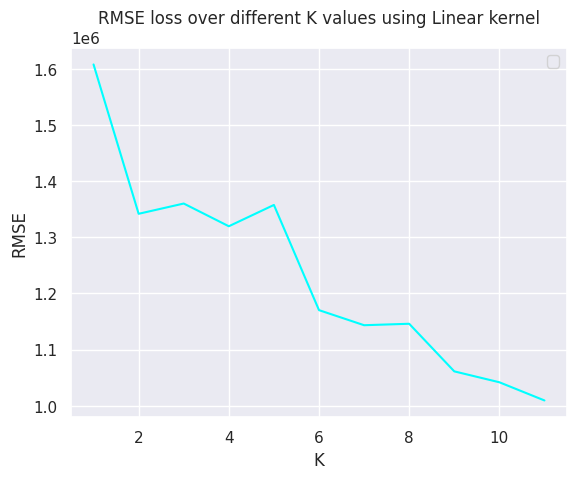

In [ ]:
n = X_standard.shape[1] + 1
k_values = range(1, len(rmse_list) + 1)
#plt.plot(range(1,n), rmse_list, color='cyan')
plt.plot(k_values, rmse_list, color='cyan')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Linear kernel')
plt.legend()
plt.show()

K=1: RMSE = 1765331.32, R2 = -0.08
K=2: RMSE = 1400402.08, R2 = 0.32
K=3: RMSE = 1406861.09, R2 = 0.31
K=4: RMSE = 1340587.82, R2 = 0.38
K=5: RMSE = 1352282.99, R2 = 0.37
K=6: RMSE = 1320588.54, R2 = 0.39
K=7: RMSE = 1358996.45, R2 = 0.36
K=8: RMSE = 1526250.55, R2 = 0.19
K=9: RMSE = 1456280.15, R2 = 0.26
K=10: RMSE = 1442979.28, R2 = 0.28
K=11: RMSE = 1325907.49, R2 = 0.39

Polynomial kernel
Best K value is : 6
Best RMSE (K=6): 1320588.54
Corresponding Best R2: 0.39


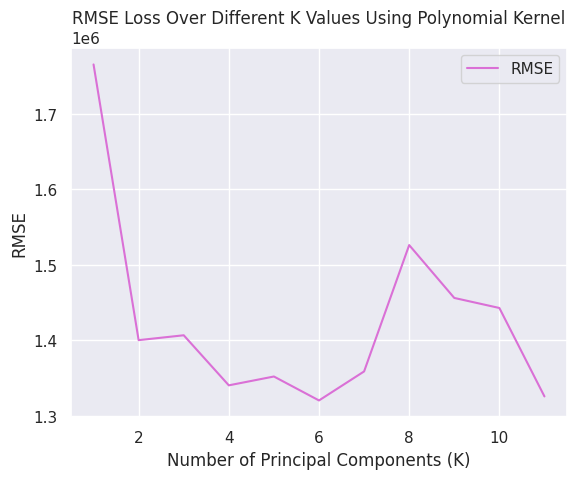

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming X_standard and y are predefined and standardized features and target variables
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
n = X_standard.shape[1]  # The total number of features

for k in range(1, n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_standard)
    X_training, X_testing, y_training, y_testing = train_test_split(principal_components, y, test_size=0.20, random_state=0)
    svr_lin = SVR(kernel='poly', C=5e6, degree=2)
    y_fit = svr_lin.fit(X_training, y_training.ravel())
    y_pred = y_fit.predict(X_testing)
    rmse = sqrt(mean_squared_error(y_testing, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_testing, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k
    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("\nPolynomial kernel")
print("Best K value is :", best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')

# Ensure the length of the range matches the length of rmse_list
plt.plot(range(1, len(rmse_list) + 1), rmse_list, color='orchid')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('RMSE')
plt.title('RMSE Loss Over Different K Values Using Polynomial Kernel')
plt.legend(['RMSE'])
plt.grid(True)
plt.show()

K=1: RMSE = 1595919.61, R2 = 0.12
K=2: RMSE = 1305471.19, R2 = 0.41
K=3: RMSE = 1318173.01, R2 = 0.40
K=4: RMSE = 1291308.92, R2 = 0.42
K=5: RMSE = 1289024.80, R2 = 0.42
K=6: RMSE = 1122000.15, R2 = 0.56
K=7: RMSE = 1111893.80, R2 = 0.57
K=8: RMSE = 1129742.21, R2 = 0.56
K=9: RMSE = 1014164.73, R2 = 0.64
K=10: RMSE = 986947.09, R2 = 0.66
K=11: RMSE = 972404.91, R2 = 0.67

RBF kernel
Best K value is : 11
Best RMSE (K=11): 972404.91
Corresponding Best R2: 0.67


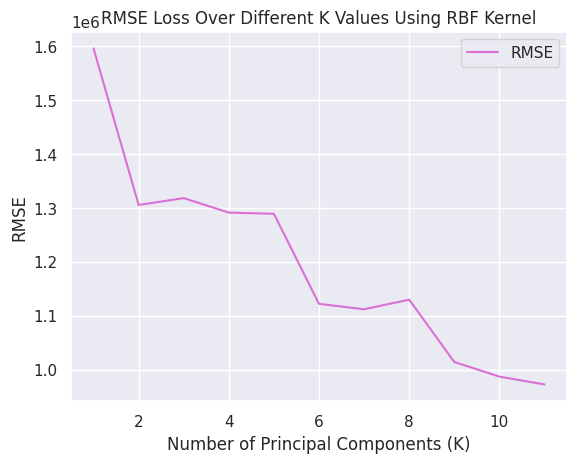

In [ ]:
# Assuming X_standard and y are predefined and standardized features and target variables
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
n = X_standard.shape[1]  # The total number of features

for k in range(1, n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_standard)
    X_training, X_testing, y_training, y_testing = train_test_split(principal_components, y, test_size=0.20, random_state=0)
    svr_rbf = SVR(kernel='rbf', C=3e6, gamma=0.1)
    y_fit = svr_rbf.fit(X_training, y_training.ravel())
    y_pred = y_fit.predict(X_testing)
    rmse = sqrt(mean_squared_error(y_testing, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_testing, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k
    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("\nRBF kernel")
print("Best K value is :", best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')

# Corrected range for plotting to match the length of rmse_list
plt.plot(range(1, len(rmse_list) + 1), rmse_list, color='orchid')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('RMSE')
plt.title('RMSE Loss Over Different K Values Using RBF Kernel')
plt.legend(['RMSE'])
plt.grid(True)
plt.show()
